In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# use seaborn plotting defaults
import seaborn as sns; sns.set()

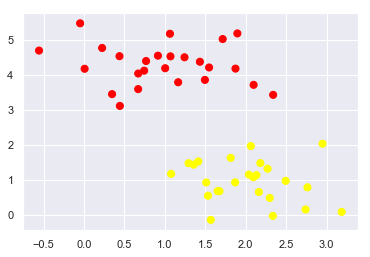

In [2]:
from sklearn.datasets.samples_generator import make_blobs
X, y = make_blobs(n_samples=50, centers=2,
                  random_state=0, cluster_std=0.60)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn');

(-1, 3.5)

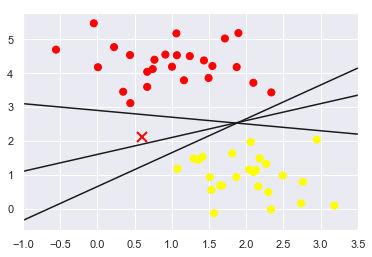

In [3]:
xfit = np.linspace(-1,3.5)
plt.scatter(X[:,0],X[:,1],c=y,s=50,cmap='autumn')
plt.plot([0.6],[2.1],'x',color='red',markeredgewidth=2,markersize=10)
for m,b in [(1,0.65),(0.5,1.6),(-0.2,2.9)]:
    plt.plot(xfit,m*xfit+b,'-k')
plt.xlim(-1, 3.5);
plt.xlim(-1,3.5)


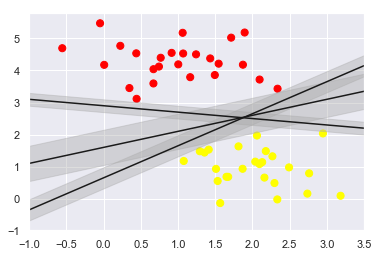

In [4]:

xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')

for m, b, d in [(1, 0.65, 0.33), (0.5, 1.6, 0.55), (-0.2, 2.9, 0.2)]:
    yfit = m * xfit + b
    plt.plot(xfit, yfit, '-k')
    plt.fill_between(xfit, yfit - d, yfit + d, edgecolor='none',
                     color='#AAAAAA', alpha=0.4)

plt.xlim(-1, 3.5);

In [5]:
from sklearn.svm import SVC # "Support vector classifier"
model = SVC(kernel='linear', C=1E10)
model.fit(X, y)

SVC(C=10000000000.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [6]:
def plot_svc_decision_function(model, ax=None, plot_support=True):
    """Plot the decision function for a 2D SVC"""
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    
    # plot decision boundary and margins
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    
    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

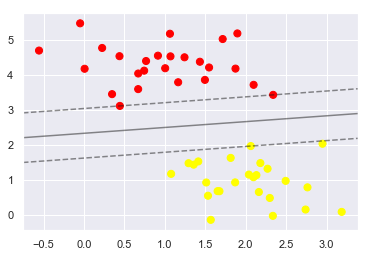

In [7]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(model);


In [8]:
model.support_vectors_

array([[0.44359863, 3.11530945],
       [2.33812285, 3.43116792],
       [2.06156753, 1.96918596]])

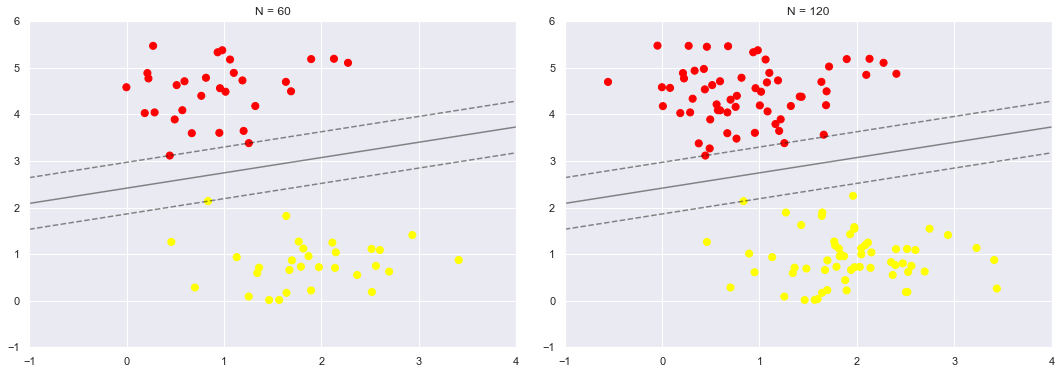

In [9]:
def plot_svm(N=10, ax=None):
    X, y = make_blobs(n_samples=200, centers=2,
                      random_state=0, cluster_std=0.60)
    X = X[:N]
    y = y[:N]
    model = SVC(kernel='linear', C=1E10)
    model.fit(X, y)
    
    ax = ax or plt.gca()
    ax.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
    ax.set_xlim(-1, 4)
    ax.set_ylim(-1, 6)
    plot_svc_decision_function(model, ax)

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)
for axi, N in zip(ax, [60, 120]):
    plot_svm(N, axi)
    axi.set_title('N = {0}'.format(N))

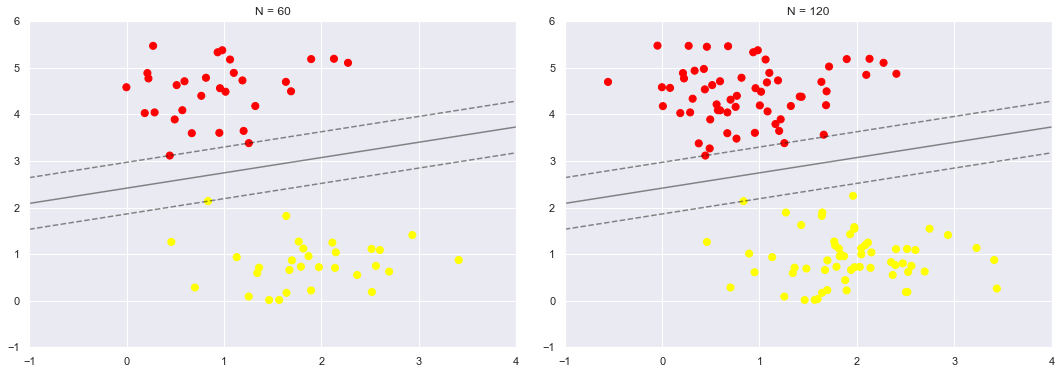

In [10]:
def plot_svm(N=10, ax=None):
    X, y = make_blobs(n_samples=200, centers=2,
                      random_state=0, cluster_std=0.60)
    X = X[:N]
    y = y[:N]
    model = SVC(kernel='linear', C=1E10)
    model.fit(X, y)
    
    ax = ax or plt.gca()
    ax.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
    ax.set_xlim(-1, 4)
    ax.set_ylim(-1, 6)
    plot_svc_decision_function(model, ax)

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)
for axi, N in zip(ax, [60, 120]):
    plot_svm(N, axi)
    axi.set_title('N = {0}'.format(N))

In [11]:
from ipywidgets import interact, fixed
interact(plot_svm, N=[10, 200], ax=fixed(None));

interactive(children=(Dropdown(description='N', options=(10, 200), value=10), Output()), _dom_classes=('widget…

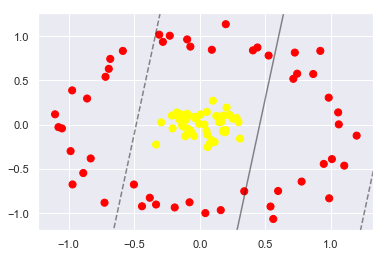

In [12]:
from sklearn.datasets.samples_generator import make_circles
X, y = make_circles(100, factor=.1, noise=.1)

clf = SVC(kernel='linear').fit(X, y)

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(clf, plot_support=False);

In [13]:
r = np.exp(-(X ** 2).sum(1))

In [14]:
from mpl_toolkits import mplot3d

def plot_3D(elev=30, azim=30, X=X, y=y):
    ax = plt.subplot(projection='3d')
    ax.scatter3D(X[:, 0], X[:, 1], r, c=y, s=50, cmap='autumn')
    ax.view_init(elev=elev, azim=azim)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('r')

interact(plot_3D, elev=[-90, 90], azip=(-180, 180),
         X=fixed(X), y=fixed(y));

interactive(children=(Dropdown(description='elev', options=(-90, 90), value=-90), IntSlider(value=30, descript…

In [15]:
clf = SVC(kernel='rbf', C=1E6)
clf.fit(X, y)

/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1000000.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

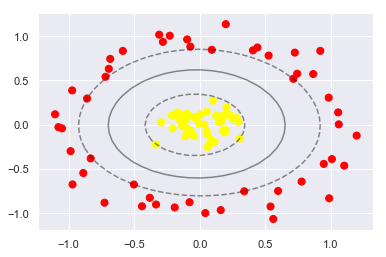

In [16]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(clf)
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
            s=300, lw=1, facecolors='none');

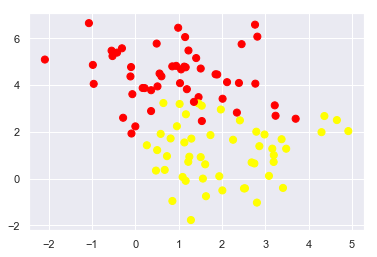

In [17]:
X, y = make_blobs(n_samples=100, centers=2,
                  random_state=0, cluster_std=1.2)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn');

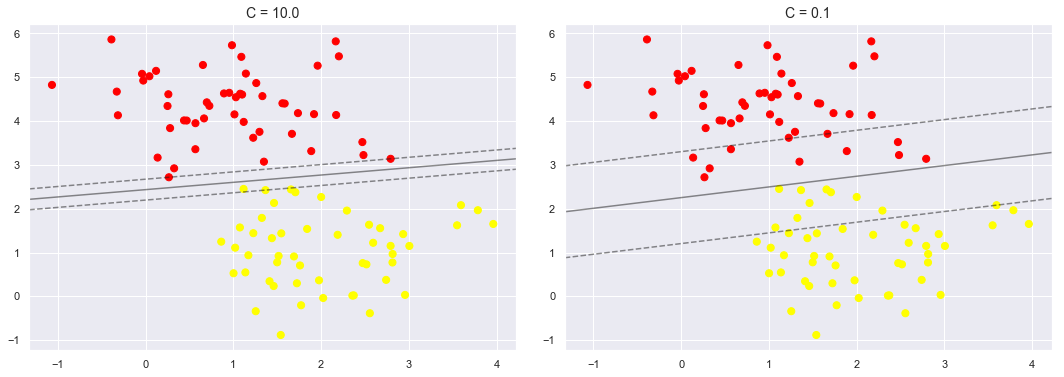

In [18]:
X, y = make_blobs(n_samples=100, centers=2,
                  random_state=0, cluster_std=0.8)

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)

for axi, C in zip(ax, [10.0, 0.1]):
    model = SVC(kernel='linear', C=C).fit(X, y)
    axi.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
    plot_svc_decision_function(model, axi)
    axi.scatter(model.support_vectors_[:, 0],
                model.support_vectors_[:, 1],
                s=300, lw=1, facecolors='none');
    axi.set_title('C = {0:.1f}'.format(C), size=14)

In [19]:
from sklearn.datasets import fetch_lfw_people
faces = fetch_lfw_people(min_faces_per_person=60)
print(faces.target_names)
print(faces.images.shape)

['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Junichiro Koizumi' 'Tony Blair']
(1348, 62, 47)


In [20]:
fig, ax = ply.subplots(3,5)
for i, axi in enumerate(ax.flat):
    axi.imshow(face.images[i],cmap='bone')
    axi.set(xtics=[],yticks=[],xlabel=face.target_names[faces.target[i]])

NameError: name 'ply' is not defined

In [21]:
from sklearn.svm import SVC
from sklearn.decomposition import RandomizedPCA
from sklearn.pipeline import make_pipeline

pca = RandomizedPCA(n_components=150, whiten=True, random_state=42)
svc = SVC(kernel='rbf', class_weight='balanced')
model = make_pipeline(pca, svc)

ImportError: cannot import name 'RandomizedPCA' from 'sklearn.decomposition' (/anaconda3/lib/python3.7/site-packages/sklearn/decomposition/__init__.py)

In [22]:
from sklearn.cross_validation import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(faces.data, faces.target,
                                                random_state=42)

ModuleNotFoundError: No module named 'sklearn.cross_validation'

In [23]:
from sklearn.grid_search import GridSearchCV
param_grid = {'svc__C': [1, 5, 10, 50],
              'svc__gamma': [0.0001, 0.0005, 0.001, 0.005]}
grid = GridSearchCV(model, param_grid)

%time grid.fit(Xtrain, ytrain)
print(grid.best_params_)

ModuleNotFoundError: No module named 'sklearn.grid_search'

In [24]:
model = grid.best_estimator_
yfit = model.predict(Xtest)

NameError: name 'grid' is not defined

NameError: name 'Xtest' is not defined

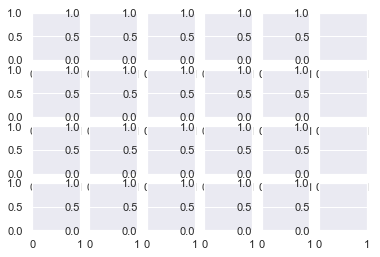

In [25]:
fig, ax = plt.subplots(4, 6)
for i, axi in enumerate(ax.flat):
    axi.imshow(Xtest[i].reshape(62, 47), cmap='bone')
    axi.set(xticks=[], yticks=[])
    axi.set_ylabel(faces.target_names[yfit[i]].split()[-1],
                   color='black' if yfit[i] == ytest[i] else 'red')
fig.suptitle('Predicted Names; Incorrect Labels in Red', size=14);

In [26]:
from sklearn.grid_search import GridSearchCV
param_grid = {'svc__C': [1, 5, 10, 50],
              'svc__gamma': [0.0001, 0.0005, 0.001, 0.005]}
grid = GridSearchCV(model, param_grid)

%time grid.fit(Xtrain, ytrain)
print(grid.best_params_)

ModuleNotFoundError: No module named 'sklearn.grid_search'

In [27]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(ytest, yfit)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=faces.target_names,
            yticklabels=faces.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label');

NameError: name 'ytest' is not defined

In [28]:
from sklearn.metrics import classification_report
print(classification_report(ytest, yfit,
                            target_names=faces.target_names))

NameError: name 'ytest' is not defined

In [29]:
import numpy as np
import math
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import svm
import sklearn.metrics as metric
%matplotlib inline

In [30]:
filedata='../downloads/SVM_Dataset1.csv'
data1=pd.read_csv(filedata)
data1

,Unnamed: 0,X1,X2,y
0,0,2.947814,6.626878,1
1,1,2.530388,7.785050,1
2,2,3.566991,5.651046,1
3,3,3.156983,5.467077,1
4,4,2.582346,4.457777,-1
5,5,2.155826,6.222343,-1
6,6,3.273418,3.520687,-1


In [31]:

X1=data1['X1']
X2=data1['X2']
X_training=np.array(list(zip(X1,X2)))
X_training

array([[2.947814, 6.626878],
       [2.530388, 7.78505 ],
       [3.566991, 5.651046],
       [3.156983, 5.467077],
       [2.582346, 4.457777],
       [2.155826, 6.222343],
       [3.273418, 3.520687]])

In [32]:
y_training=data1['y']
y_training

0    1
1    1
2    1
3    1
4   -1
5   -1
6   -1
Name: y, dtype: int64

In [33]:
target_names=['-1','+1']
target_names

['-1', '+1']

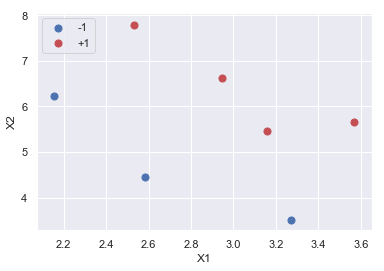

In [34]:
idxPlus=y_training[y_training<0].index
idxMin=y_training[y_training>0].index
plt.scatter(X_training[idxPlus,0],X_training[idxPlus,1],c='b',s=50)
plt.scatter(X_training[idxMin,0],X_training[idxMin,1],c='r',s=50)
plt.legend(target_names,loc=2)
plt.xlabel('X1')
plt.ylabel('X2');
plt.savefig('chart0.png')

In [35]:
svc = svm.SVC(kernel='linear').fit(X_training,y_training)
svc

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [36]:
svc.get_params(True)

{'C': 1.0,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'auto_deprecated',
 'kernel': 'linear',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [37]:
lbX1=math.floor(min(X_training[:,0]))-1
ubX1=math.ceil(max(X_training[:,0]))+1
lbX2=math.floor(min(X_training[:,1]))-1
ubX2=math.ceil(max(X_training[:,1]))+1
[lbX1,ubX1,lbX2,ubX2]

[1, 5, 2, 9]

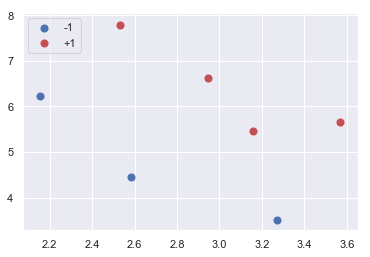

In [38]:
idxPlus=y_training[y_training<0].index
idxMin=y_training[y_training>0].index
plt.scatter(X_training[idxPlus,0],X_training[idxPlus,1],c='b',s=50)
plt.scatter(X_training[idxMin,0],X_training[idxMin,1],c='r',s=50)
plt.legend(target_names,loc=2)

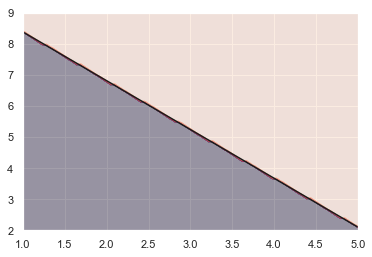

In [39]:
X,Y = np.mgrid[lbX1:ubX1:100j,lbX2:ubX2:100j]
Z = svc.decision_function(np.c_[X.ravel(),Y.ravel()])
Z = Z.reshape(X.shape)
plt.contourf(X,Y,Z > 0,alpha=0.4)
plt.contour(X,Y,Z,colors=['k'], linestyles=['-'],levels=[0])

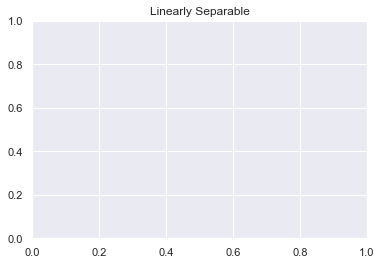

In [40]:
plt.title('Linearly Separable')
plt.savefig('chart1.png')

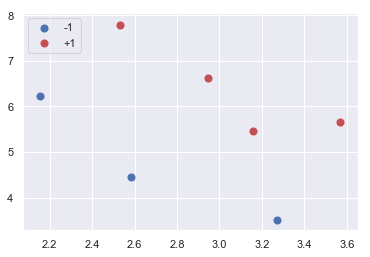

In [41]:
idxPlus=y_training[y_training<0].index
idxMin=y_training[y_training>0].index
plt.scatter(X_training[idxPlus,0],X_training[idxPlus,1],c='b',s=50)
plt.scatter(X_training[idxMin,0],X_training[idxMin,1],c='r',s=50)
plt.legend(target_names,loc=2)
X,Y = np.mgrid[lbX1:ubX1:100j,lbX2:ubX2:100j]
Z = svc.decision_function(np.c_[X.ravel(),Y.ravel()])
Z = Z.reshape(X.shape)

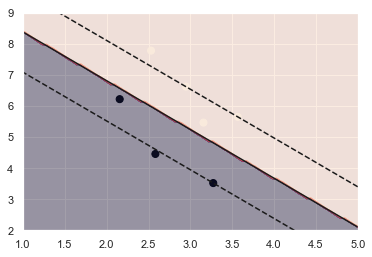

In [42]:
plt.contourf(X,Y,Z > 0,alpha=0.4)
plt.contour(X,Y,Z,colors=['k','k','k'], linestyles=['--','-','--'],levels=[-1,0,1])
plt.scatter(svc.support_vectors_[:,0],svc.support_vectors_[:,1],s=120,facecolors='none')
plt.scatter(X_training[:,0],X_training[:,1],c=y_training,s=50,alpha=0.95);

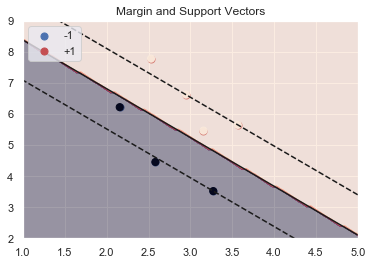

In [43]:
idxPlus=y_training[y_training<0].index
idxMin=y_training[y_training>0].index
plt.scatter(X_training[idxPlus,0],X_training[idxPlus,1],c='b',s=50)
plt.scatter(X_training[idxMin,0],X_training[idxMin,1],c='r',s=50)
plt.legend(target_names,loc=2)
X,Y = np.mgrid[lbX1:ubX1:100j,lbX2:ubX2:100j]
Z = svc.decision_function(np.c_[X.ravel(),Y.ravel()])
Z = Z.reshape(X.shape)

plt.contourf(X,Y,Z > 0,alpha=0.4)
plt.contour(X,Y,Z,colors=['k','k','k'], linestyles=['--','-','--'],levels=[-1,0,1])
plt.scatter(svc.support_vectors_[:,0],svc.support_vectors_[:,1],s=120,facecolors='none')
plt.scatter(X_training[:,0],X_training[:,1],c=y_training,s=50,alpha=0.95);

plt.title('Margin and Support Vectors')
plt.savefig('chart2.png')

In [44]:
svc.n_support_

array([2, 2], dtype=int32)

In [45]:
svc.support_ 

array([5, 6, 2, 3], dtype=int32)

In [46]:
svc.support_vectors_

array([[2.155826, 6.222343],
       [3.273418, 3.520687],
       [3.566991, 5.651046],
       [3.156983, 5.467077]])

In [47]:
weight=svc.coef_
intercept=svc.intercept_
a = -weight[0,0] / weight[0,1]
print('x2=',a,' * x1 + ',-intercept[0]/weight[0,1])

x2= -1.569743823292025  * x1 +  9.954709623187776


In [48]:
svc.score(X_training, y_training)

1.0

In [49]:
y_pred=svc.predict(X_training)
y_pred


array([ 1,  1,  1,  1, -1, -1, -1])

In [50]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

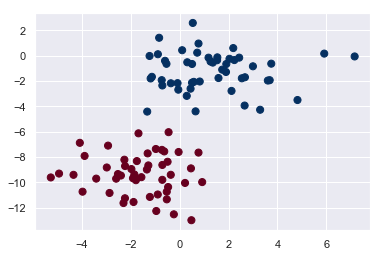

In [51]:
from sklearn.datasets import make_blobs
X, y = make_blobs(100, 2, centers=2, random_state=2, cluster_std=1.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='RdBu');

In [52]:

from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X, y);

In [53]:
rng = np.random.RandomState(0)
Xnew = [-6, -14] + [14, 18] * rng.rand(2000, 2)
ynew = model.predict(Xnew)

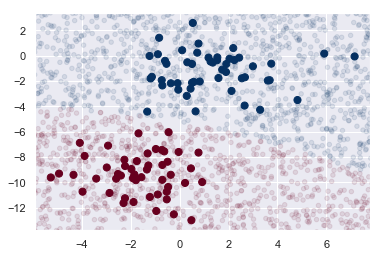

In [54]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='RdBu')
lim = plt.axis()
plt.scatter(Xnew[:, 0], Xnew[:, 1], c=ynew, s=20, cmap='RdBu', alpha=0.1)
plt.axis(lim);


In [55]:
yprob = model.predict_proba(Xnew)
yprob[-8:].round(2)

array([[0.89, 0.11],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [0.  , 1.  ],
       [0.15, 0.85]])

In [56]:
y_true = y_training
y_true

0    1
1    1
2    1
3    1
4   -1
5   -1
6   -1
Name: y, dtype: int64

In [57]:
metric.accuracy_score(y_true, y_pred, normalize=False)

7

In [58]:
cnf_matrix=metric.confusion_matrix(y_true, y_pred)
cnf_matrix

array([[3, 0],
       [0, 4]])

Confusion matrix, without normalization
[[3 0]
 [0 4]]


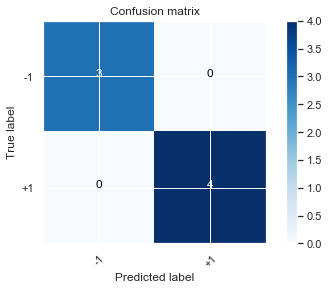

In [59]:
import itertools

# code from http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

    
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=target_names, normalize=False)
plt.show()

In [60]:
svc.predict([[3,6]])

array([1])

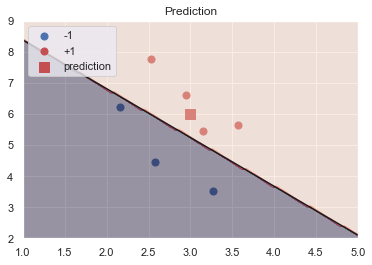

In [61]:
idxPlus=y_training[y_training<0].index
idxMin=y_training[y_training>0].index
plt.scatter(X_training[idxPlus,0],X_training[idxPlus,1],c='b',s=50)
plt.scatter(X_training[idxMin,0],X_training[idxMin,1],c='r',s=50)
plt.scatter(3,6,c='r',marker='s',s=90)
plt.legend(['-1','+1','prediction'],loc=2)

X,Y = np.mgrid[lbX1:ubX1:100j,lbX2:ubX2:100j]
Z = svc.decision_function(np.c_[X.ravel(),Y.ravel()])
Z = Z.reshape(X.shape)
plt.contourf(X,Y,Z > 0,alpha=0.4)
plt.contour(X,Y,Z,colors=['k'], linestyles=['-'],levels=[0])

plt.title('Prediction')
plt.savefig('chart3.png')

In [62]:
del X1, X2, X_training, y_training

In [63]:
filedata='../downloads/SVM_Dataset2.csv'
data2=pd.read_csv(filedata)
data2

,x1,x2,y
0,7.0,20,-1
1,8.0,12,-1
2,9.0,19,-1
3,10.0,17,-1
4,11.0,15,-1
5,13.0,14,-1
6,14.0,12,-1
7,15.0,14,-1
8,15.0,17,-1
9,16.0,16,-1


In [64]:
X1=data2['x1']
X2=data2['x2']
X_training=np.array(list(zip(X1,X2)))
X_training

array([[ 7. , 20. ],
       [ 8. , 12. ],
       [ 9. , 19. ],
       [10. , 17. ],
       [11. , 15. ],
       [13. , 14. ],
       [14. , 12. ],
       [15. , 14. ],
       [15. , 17. ],
       [16. , 16. ],
       [ 4. , 15. ],
       [ 5.5, 12. ],
       [ 7. , 10. ],
       [ 8. , 10. ],
       [ 9. ,  9. ],
       [10. ,  8. ],
       [11. ,  5. ],
       [12. ,  7. ],
       [12. ,  9. ],
       [13. , 10. ]])

In [65]:
y_training=data2['y']
y_training

0    -1
1    -1
2    -1
3    -1
4    -1
5    -1
6    -1
7    -1
8    -1
9    -1
10    1
11    1
12    1
13    1
14    1
15    1
16    1
17    1
18    1
19    1
Name: y, dtype: int64

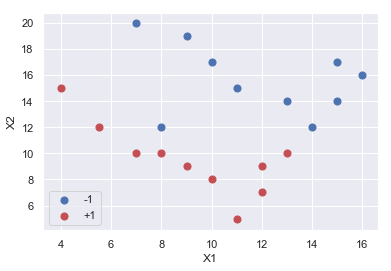

In [66]:
idxPlus=y_training[y_training<0].index
idxMin=y_training[y_training>0].index
plt.scatter(X_training[idxPlus,0],X_training[idxPlus,1],c='b',s=50)
plt.scatter(X_training[idxMin,0],X_training[idxMin,1],c='r',s=50)
plt.legend(target_names,loc=3)
plt.xlabel('X1')
plt.ylabel('X2');
plt.savefig('nl-chart0.png')

In [67]:
lbX1=math.floor(min(X_training[:,0]))-1
ubX1=math.ceil(max(X_training[:,0]))+1
lbX2=math.floor(min(X_training[:,1]))-1
ubX2=math.ceil(max(X_training[:,1]))+1
[lbX1,ubX1,lbX2,ubX2]

[3, 17, 4, 21]

0.9

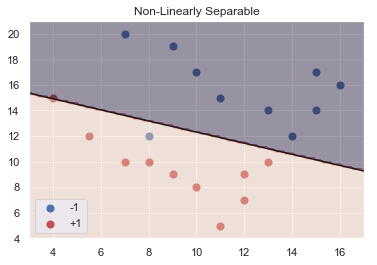

In [68]:
svc = svm.SVC(kernel='linear',C=0.001).fit(X_training,y_training)

idxPlus=y_training[y_training<0].index
idxMin=y_training[y_training>0].index
plt.scatter(X_training[idxPlus,0],X_training[idxPlus,1],c='b',s=50)
plt.scatter(X_training[idxMin,0],X_training[idxMin,1],c='r',s=50)
plt.legend(target_names,loc=3)

X,Y = np.mgrid[lbX1:ubX1:100j,lbX2:ubX2:100j]
Z = svc.decision_function(np.c_[X.ravel(),Y.ravel()])
Z = Z.reshape(X.shape)
plt.contourf(X,Y,Z > 0,alpha=0.4)
plt.contour(X,Y,Z,colors=['k'], linestyles=['-'],levels=[0])
plt.title('Non-Linearly Separable')
plt.savefig('nl-chart1.png')

svc.score(X_training,y_training)

0.95

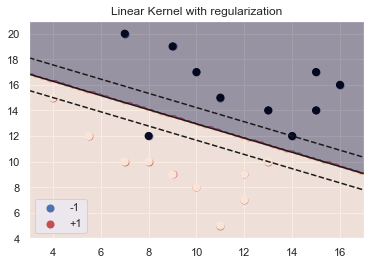

In [69]:
svc = svm.SVC(kernel='linear',C=100).fit(X_training,y_training)

idxPlus=y_training[y_training<0].index
idxMin=y_training[y_training>0].index
plt.scatter(X_training[idxPlus,0],X_training[idxPlus,1],c='b',s=50)
plt.scatter(X_training[idxMin,0],X_training[idxMin,1],c='r',s=50)
plt.legend(target_names,loc=3)

X,Y = np.mgrid[lbX1:ubX1:100j,lbX2:ubX2:100j]
Z = svc.decision_function(np.c_[X.ravel(),Y.ravel()])
Z = Z.reshape(X.shape)
plt.contourf(X,Y,Z > 0,alpha=0.4)
plt.contour(X,Y,Z,colors=['k','k','k'], linestyles=['--','-','--'],levels=[-1,0,1])
plt.scatter(svc.support_vectors_[:,0],svc.support_vectors_[:,1],s=120,facecolors='none')
plt.scatter(X_training[:,0],X_training[:,1],c=y_training,s=50,alpha=0.95);

plt.title('Linear Kernel with regularization')
plt.savefig('nl-chart-regularization.png')

svc.score(X_training,y_training)

In [70]:
svc.n_support_

array([2, 2], dtype=int32)

In [71]:
svc.support_vectors_

array([[ 8., 12.],
       [14., 12.],
       [ 4., 15.],
       [13., 10.]])

In [72]:
svc.score(X_training,y_training)

0.95

In [73]:
y_pred=svc.predict(X_training)
y_true = y_training
metric.accuracy_score(y_true, y_pred, normalize=False)

19

/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


1.0

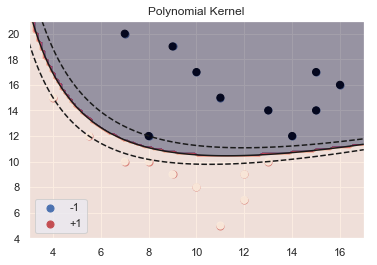

In [74]:
svc = svm.SVC(kernel='poly',C=1, degree=2, probability=True).fit(X_training,y_training)

idxPlus=y_training[y_training<0].index
idxMin=y_training[y_training>0].index
plt.scatter(X_training[idxPlus,0],X_training[idxPlus,1],c='b',s=50)
plt.scatter(X_training[idxMin,0],X_training[idxMin,1],c='r',s=50)
plt.legend(target_names,loc=3)

X,Y = np.mgrid[lbX1:ubX1:100j,lbX2:ubX2:100j]
Z = svc.decision_function(np.c_[X.ravel(),Y.ravel()])
Z = Z.reshape(X.shape)
plt.contourf(X,Y,Z > 0,alpha=0.4)

plt.contour(X,Y,Z,colors=['k','k','k'], linestyles=['--','-','--'],levels=[-1,0,1])
plt.scatter(svc.support_vectors_[:,0],svc.support_vectors_[:,1],s=120,facecolors='none')
plt.scatter(X_training[:,0],X_training[:,1],c=y_training,s=50,alpha=0.95);

plt.title('Polynomial Kernel')
plt.savefig('nl-poly2-kernel.png')

svc.score(X_training,y_training)

In [75]:
svc.support_vectors_

array([[ 8. , 12. ],
       [ 4. , 15. ],
       [ 5.5, 12. ],
       [13. , 10. ]])

1.0

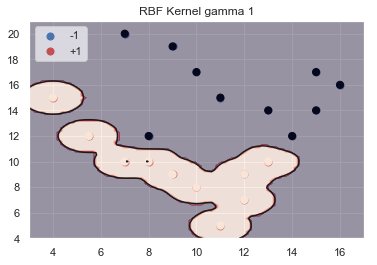

In [76]:
svc = svm.SVC(kernel='rbf',C=1, gamma=3).fit(X_training,y_training)

idxPlus=y_training[y_training<0].index
idxMin=y_training[y_training>0].index
plt.scatter(X_training[idxPlus,0],X_training[idxPlus,1],c='b',s=50)
plt.scatter(X_training[idxMin,0],X_training[idxMin,1],c='r',s=50)
plt.legend(['-1','+1'],loc=2)

X,Y = np.mgrid[lbX1:ubX1:100j,lbX2:ubX2:100j]
Z = svc.decision_function(np.c_[X.ravel(),Y.ravel()])
Z = Z.reshape(X.shape)
plt.contourf(X,Y,Z > 0,alpha=0.4)

plt.contour(X,Y,Z,colors=['k','k','k'], linestyles=['--','-','--'],levels=[-1,0,1])
plt.scatter(svc.support_vectors_[:,0],svc.support_vectors_[:,1],s=120,facecolors='none')
plt.scatter(X_training[:,0],X_training[:,1],c=y_training,s=50,alpha=0.95);

plt.title('RBF Kernel gamma 1')
plt.savefig('nl-RBF1-kernel.png')

svc.score(X_training,y_training)

In [77]:
y_pred=svc.predict(X_training)
y_true = y_training
metric.accuracy_score(y_true, y_pred, normalize=False)

20

In [78]:
svc.n_support_

array([10, 10], dtype=int32)